In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import colourblind as cb

In [74]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [4]:
# Each dyad relation of an alliance
ally_dyad = pd.read_csv("./COW_data/alliance_v4.1_by_dyad.csv")

In [5]:
ally_dyad.info()
#Extra column 'asymmetric' if the alliance only applies one way
ally_dyad.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3222 entries, 0 to 3221
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   version4id      3222 non-null   int64  
 1   ccode1          3222 non-null   int64  
 2   state_name1     3222 non-null   object 
 3   ccode2          3222 non-null   int64  
 4   state_name2     3222 non-null   object 
 5   dyad_st_day     3222 non-null   int64  
 6   dyad_st_month   3222 non-null   int64  
 7   dyad_st_year    3222 non-null   int64  
 8   dyad_end_day    1626 non-null   float64
 9   dyad_end_month  1626 non-null   float64
 10  dyad_end_year   1626 non-null   float64
 11  left_censor     3222 non-null   int64  
 12  right_censor    3222 non-null   int64  
 13  defense         3222 non-null   int64  
 14  neutrality      3222 non-null   int64  
 15  nonaggression   3222 non-null   int64  
 16  entente         3221 non-null   float64
 17  asymmetric      3222 non-null   i

,version4id,ccode1,state_name1,ccode2,state_name2,dyad_st_day,dyad_st_month,dyad_st_year,dyad_end_day,dyad_end_month,dyad_end_year,left_censor,right_censor,defense,neutrality,nonaggression,entente,asymmetric,version
0,1,200,United Kingdom,235,Portugal,1,1,1816,NaN,NaN,NaN,1,1,1,0,1,0.0,0,4.1
1,2,200,United Kingdom,380,Sweden,1,1,1816,15.0,2.0,1911.0,1,0,0,0,0,1.0,0,4.1
2,3,240,Hanover,245,Bavaria,1,1,1838,15.0,3.0,1848.0,0,0,1,0,1,1.0,0,4.1
3,3,240,Hanover,245,Bavaria,29,11,1850,15.0,6.0,1866.0,0,0,1,0,1,1.0,0,4.1
4,3,240,Hanover,255,Germany,1,1,1838,15.0,3.0,1848.0,0,0,1,0,1,1.0,0,4.1


In [6]:
print("There are",ally_dyad['version4id'].nunique(),"alliances in the dataset.")

There are 414 alliances in the dataset.


In [7]:
ally_dyad.isnull().sum()

version4id           0
ccode1               0
state_name1          0
ccode2               0
state_name2          0
dyad_st_day          0
dyad_st_month        0
dyad_st_year         0
dyad_end_day      1596
dyad_end_month    1596
dyad_end_year     1596
left_censor          0
right_censor         0
defense              0
neutrality           0
nonaggression        0
entente              1
asymmetric           0
version              0
dtype: int64

In [8]:
# The entry with a missing value
ally_dyad[ally_dyad['entente'].isnull()]

,version4id,ccode1,state_name1,ccode2,state_name2,dyad_st_day,dyad_st_month,dyad_st_year,dyad_end_day,dyad_end_month,dyad_end_year,left_censor,right_censor,defense,neutrality,nonaggression,entente,asymmetric,version
352,122,630,Iran,640,Turkey,22,4,1926,8.0,7.0,1937.0,0,0,0,1,1,NaN,0,4.1


In [9]:
# Value missing from alliance_direct
ally_dyad[ally_dyad['version4id'] == 6]

,version4id,ccode1,state_name1,ccode2,state_name2,dyad_st_day,dyad_st_month,dyad_st_year,dyad_end_day,dyad_end_month,dyad_end_year,left_censor,right_censor,defense,neutrality,nonaggression,entente,asymmetric,version
94,6,200,United Kingdom,255,Germany,1,1,1816,31.0,10.0,1822.0,1,0,1,0,0,1.0,0,4.1
95,6,200,United Kingdom,300,Austria-Hungary,1,1,1816,31.0,10.0,1822.0,1,0,1,0,0,1.0,0,4.1
96,6,200,United Kingdom,365,Russia,1,1,1816,31.0,10.0,1822.0,1,0,1,0,0,1.0,0,4.1
97,6,255,Germany,300,Austria-Hungary,1,1,1816,31.0,10.0,1822.0,1,0,1,0,0,1.0,0,4.1
98,6,255,Germany,365,Russia,1,1,1816,31.0,10.0,1822.0,1,0,1,0,0,1.0,0,4.1
99,6,300,Austria-Hungary,365,Russia,1,1,1816,31.0,10.0,1822.0,1,0,1,0,0,1.0,0,4.1


In [10]:
yugo = pd.concat([ally_dyad[ally_dyad['state_name1'] == 'Serbia'], ally_dyad[ally_dyad['state_name2'] == 'Serbia']])
yugo

,version4id,ccode1,state_name1,ccode2,state_name2,dyad_st_day,dyad_st_month,dyad_st_year,dyad_end_day,dyad_end_month,dyad_end_year,left_censor,right_censor,defense,neutrality,nonaggression,entente,asymmetric,version


In [11]:
# Alliances starting prior to 1816
ally_dyad[ally_dyad['left_censor'] == 1]

,version4id,ccode1,state_name1,ccode2,state_name2,dyad_st_day,dyad_st_month,dyad_st_year,dyad_end_day,dyad_end_month,dyad_end_year,left_censor,right_censor,defense,neutrality,nonaggression,entente,asymmetric,version
0,1,200,United Kingdom,235,Portugal,1,1,1816,NaN,NaN,NaN,1,1,1,0,1,0.0,0,4.1
1,2,200,United Kingdom,380,Sweden,1,1,1816,15.0,2.0,1911.0,1,0,0,0,0,1.0,0,4.1
20,3,245,Bavaria,255,Germany,1,1,1816,15.0,3.0,1848.0,1,0,1,0,1,1.0,0,4.1
22,3,245,Bavaria,267,Baden,1,1,1816,15.0,3.0,1848.0,1,0,1,0,1,1.0,0,4.1
24,3,245,Bavaria,269,Saxony,1,1,1816,15.0,3.0,1848.0,1,0,1,0,1,1.0,0,4.1
26,3,245,Bavaria,271,Wuerttemburg,1,1,1816,15.0,3.0,1848.0,1,0,1,0,1,1.0,0,4.1
28,3,245,Bavaria,273,Hesse Electoral,1,1,1816,15.0,3.0,1848.0,1,0,1,0,1,1.0,0,4.1
30,3,245,Bavaria,275,Hesse Grand Ducal,1,1,1816,15.0,3.0,1848.0,1,0,1,0,1,1.0,0,4.1
34,3,245,Bavaria,300,Austria-Hungary,1,1,1816,15.0,3.0,1848.0,1,0,1,0,1,1.0,0,4.1
36,3,255,Germany,267,Baden,1,1,1816,15.0,3.0,1848.0,1,0,1,0,1,1.0,0,4.1


In [12]:
x = ally_dyad
x[x['version4id'] == 199]

,version4id,ccode1,state_name1,ccode2,state_name2,dyad_st_day,dyad_st_month,dyad_st_year,dyad_end_day,dyad_end_month,dyad_end_year,left_censor,right_censor,defense,neutrality,nonaggression,entente,asymmetric,version
915,199,435,Mauritania,520,Somalia,22,1,1974,NaN,NaN,NaN,0,1,0,0,1,1.0,0,4.1
916,199,435,Mauritania,522,Djibouti,22,1,1975,NaN,NaN,NaN,0,1,0,0,1,1.0,0,4.1
917,199,435,Mauritania,600,Morocco,22,1,1973,NaN,NaN,NaN,0,1,0,0,1,1.0,0,4.1
918,199,435,Mauritania,615,Algeria,22,1,1973,NaN,NaN,NaN,0,1,0,0,1,1.0,0,4.1
919,199,435,Mauritania,616,Tunisia,22,1,1973,NaN,NaN,NaN,0,1,0,0,1,1.0,0,4.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1161,199,692,Bahrain,696,United Arab Emirates,22,1,1972,NaN,NaN,NaN,0,1,0,0,1,1.0,0,4.1
1162,199,692,Bahrain,698,Oman,22,1,1971,NaN,NaN,NaN,0,1,0,0,1,1.0,0,4.1
1163,199,694,Qatar,696,United Arab Emirates,22,1,1972,NaN,NaN,NaN,0,1,0,0,1,1.0,0,4.1
1164,199,694,Qatar,698,Oman,22,1,1971,NaN,NaN,NaN,0,1,0,0,1,1.0,0,4.1


In [13]:
# Converting the 0 / 1 to be True and False
#ally_dyad['asymmetric'] = ally_dyad['asymmetric'].astype(bool)
num_alliances = ally_dyad['version4id'].nunique()

# Count asymmetric alliances
asymmetric_count = ally_dyad['version4id'].groupby(ally_dyad['asymmetric']).nunique()[1]
symmetric_count = num_alliances - asymmetric_count

print("Number of asymmetric alliances:", asymmetric_count)
print("Number of symmetric alliances:", symmetric_count)

Number of asymmetric alliances: 45
Number of symmetric alliances: 369


In [14]:
left_censor_num = ally_dyad['version4id'].groupby(ally_dyad['left_censor']).nunique()[1]
print(f"There are {left_censor_num} alliances that started prior to 1816, which is { left_censor_num/num_alliances*100}% of the alliances.")

#print(max(ally_dyad['version']))

There are 6 alliances that started prior to 1816, which is 1.4492753623188406% of the alliances.


In [15]:
# Count the number of alliances per country
counts1 = ally_dyad['version4id'].groupby(ally_dyad['state_name1']).nunique()
counts2 = ally_dyad['version4id'].groupby(ally_dyad['state_name2']).nunique()

# Create a dataframe with the number of alliances per country
alliance_per_country = counts1 + counts2
alliance_per_country = alliance_per_country.reset_index().rename(columns={'index':'state_name','version4id':'no_of_alliances'})
alliance_per_country.head()

,state_name,no_of_alliances
0,Afghanistan,9.0
1,Albania,8.0
2,Algeria,11.0
3,Angola,10.0
4,Antigua & Barbuda,6.0


In [16]:
# Most alliances
print(alliance_per_country.loc[alliance_per_country['no_of_alliances'].idxmax()]['state_name'], " has the most alliances with ", alliance_per_country['no_of_alliances'].max(), " alliances.\n")

# Least alliances
min_states = alliance_per_country[alliance_per_country['no_of_alliances'] == alliance_per_country['no_of_alliances'].min()]

print("The states:", ', '.join(min_states['state_name'].values), " have the least alliances with only", alliance_per_country['no_of_alliances'].min(),"alliances.")

Russia  has the most alliances with  109.0  alliances.

The states: Bahamas, Belize, Cyprus, Djibouti, Equatorial Guinea, Guyana, Hesse Electoral, Jamaica, Malta, Norway, South Africa, Suriname, Tanzania, Trinidad and Tobago, Zimbabwe  have the least alliances with only 2.0 alliances.


In [17]:
# The average duration of an alliance

#durations = pd.DataFrame({'version4id':ally_dyad['version4id'], 'state_name1':ally_dyad['state_name1'], 'state_name2':ally_dyad['state_name2'], 'duration':ally_dyad['dyad_end_year'] - ally_dyad['dyad_st_year']})
year_min_max = ally_dyad.groupby('version4id').agg({'dyad_end_year':'max','dyad_st_year':'min'}).reset_index()
durations = pd.DataFrame({'version4id':year_min_max['version4id'], 'duration':year_min_max['dyad_end_year'] - year_min_max['dyad_st_year']})
durations

,version4id,duration
0,1,NaN
1,2,95.0
2,3,50.0
3,4,4.0
4,5,32.0
...,...,...
409,410,NaN
410,411,NaN
411,412,0.0
412,413,NaN


In [18]:

durations.dropna(inplace=True)

duration_mean = durations['duration'].mean()
duration_mode = durations['duration'].mode()
duration_median = durations['duration'].median()
duration_max = durations['duration'].max()
duration_std = durations['duration'].std()


print("Ended Alliances\nMax: {} years\nMean: {} years\nMedian: {} years\nMode: {} years\nStandard Deviation: {}".format(duration_max, duration_mean,duration_median,duration_mode.values[0],duration_std))


Ended Alliances
Max: 95.0 years
Mean: 11.320987654320987 years
Median: 7.0 years
Mode: 1.0 years
Standard Deviation: 12.7026748461702


Number of modes: 1
The distribution is unimodal.


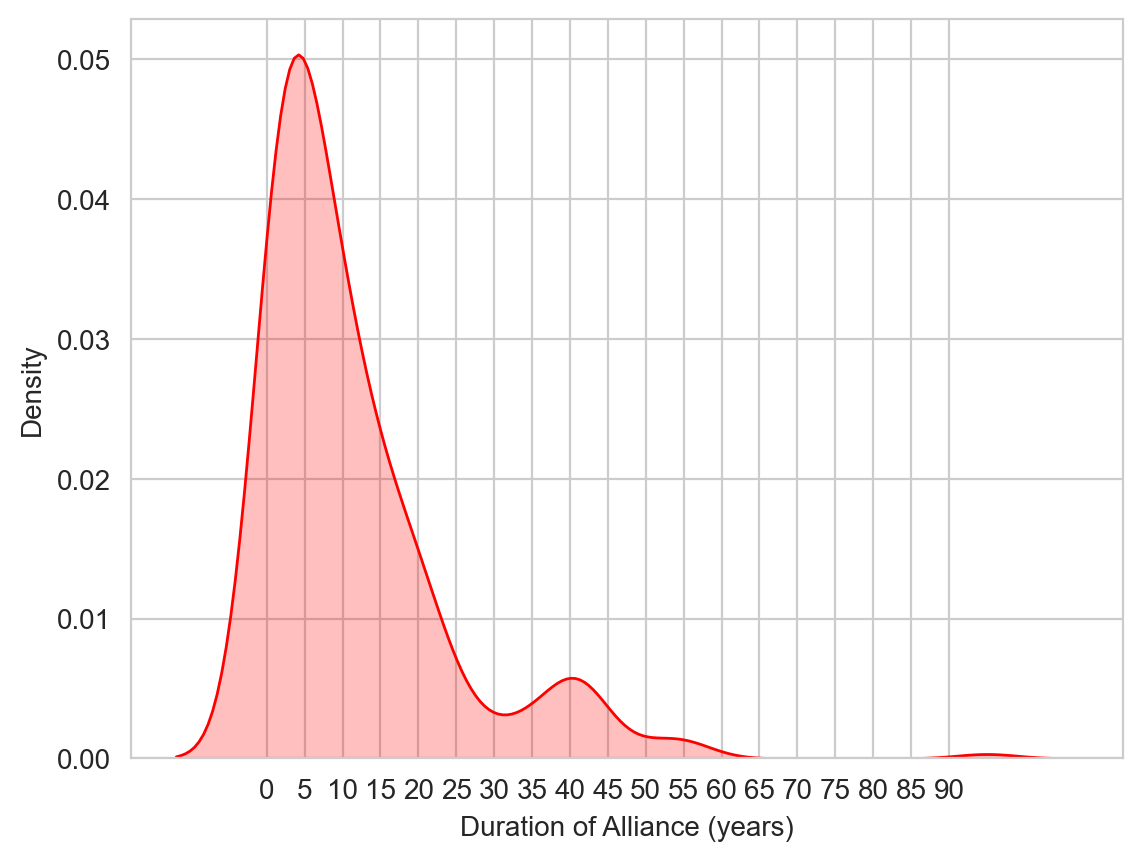

In [19]:
# Plot the kernel density estimation (KDE) plot
sns.kdeplot(durations['duration'], fill=True, color='red')
plt.xlabel('Duration of Alliance (years)')
plt.ylabel('Density')
#plt.title('Density Plot of Ended Alliance Durations')

# Determine the number of modes
num_modes = len(duration_mode)

# Print the number of modes
print("Number of modes:", num_modes)

# Determine if the distribution is unimodal, bimodal, or multimodal
if num_modes == 1:
    print("The distribution is unimodal.")
elif num_modes == 2:
    print("The distribution is bimodal.")
else:
    print("The distribution is multimodal.")

plt.xticks(range(0,95,5))
plt.show()

In [20]:
# On going alliances duration as of 31/12/12

ongoing_alliances = ally_dyad[ally_dyad['right_censor'] == 1]

ongoing_year_min = ongoing_alliances.groupby('version4id').agg({'dyad_st_year':'min'}).reset_index()
ongoing_durations = pd.DataFrame({'version4id':ongoing_year_min['version4id'], 'duration':2013 - ongoing_year_min['dyad_st_year']})
#valid_durations = pd.DataFrame({'version4id':valid_alliances['version4id'], 'state_name1':valid_alliances['state_name1'], 'state_name2':valid_alliances['state_name2'], 'duration':2013 - valid_alliances['dyad_st_year']})

duration_count = len(durations)
total_ongoing_alliances = len(ongoing_durations)
print("There are", total_ongoing_alliances, "alliances in the dataset out of the",duration_count,"that have not ended which is",total_ongoing_alliances/num_alliances*100,"%\n")

ongoing_durations.head()

There are 98 alliances in the dataset out of the 324 that have not ended which is 23.67149758454106 %



,version4id,duration
0,1,197
1,88,102
2,170,75
3,185,74
4,199,68


In [21]:
ongoing_duration_mean = ongoing_durations['duration'].mean()
ongoing_duration_mode = ongoing_durations['duration'].mode()
ongoing_duration_median = ongoing_durations['duration'].median()
ongoing_duration_max = ongoing_durations['duration'].max()
ongoing_duration_std = ongoing_durations['duration'].std()


print("Ongoing Alliances\nMax: {} years\nMean: {} years\nMedian: {} years\nMode: {} years\nStandard Deviation: {}".format(ongoing_duration_max, ongoing_duration_mean,ongoing_duration_median,ongoing_duration_mode.values[0],ongoing_duration_std))

Ongoing Alliances
Max: 197 years
Mean: 29.193877551020407 years
Median: 21.0 years
Mode: 21 years
Standard Deviation: 25.725617287241015


Modes: 1
The distribution is unimodal.


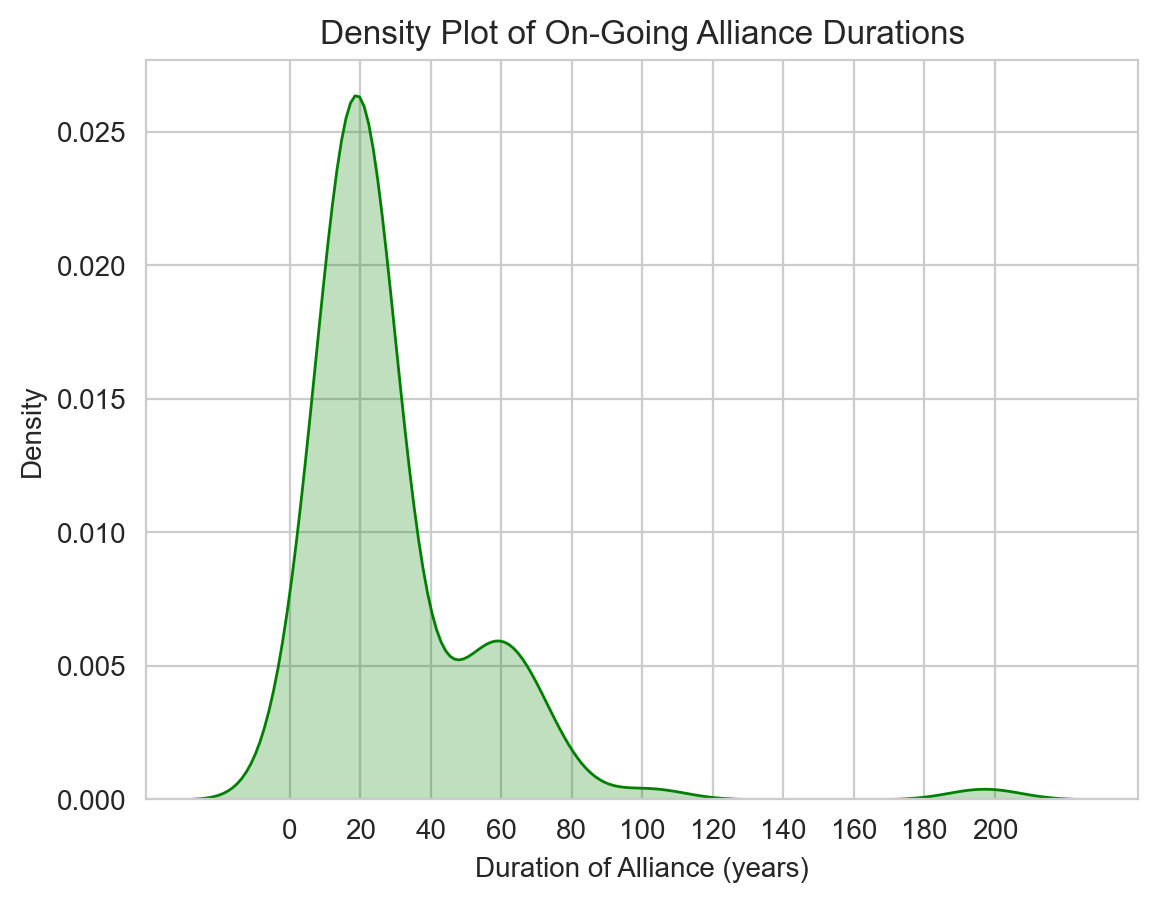

duration
21     20
20      7
19      7
22      6
18      5
13      5
17      4
62      3
54      3
32      2
7       2
8       2
11      2
15      2
16      2
34      2
197     1
24      1
6       1
5       1
4       1
23      1
31      1
29      1
63      1
75      1
74      1
68      1
66      1
65      1
64      1
60      1
102     1
55      1
53      1
52      1
50      1
41      1
9       1
3       1
Name: count, dtype: int64

In [22]:
# Plot the kernel density estimation (KDE) plot
sns.kdeplot(ongoing_durations['duration'], fill=True,color='green')
plt.xlabel('Duration of Alliance (years)')
plt.ylabel('Density')
plt.title('Density Plot of On-Going Alliance Durations')

# Determine the number of modes
num_modes = len(ongoing_duration_mode)

# Print the number of modes
print("Modes:", num_modes)

# Determine if the distribution is unimodal, bimodal, or multimodal
if num_modes == 1:
    print("The distribution is unimodal.")
elif num_modes == 2:
    print("The distribution is bimodal.")
else:
    print("The distribution is multimodal.")

plt.xticks(range(0,205,20))
plt.show()
ongoing_durations['duration'].value_counts()

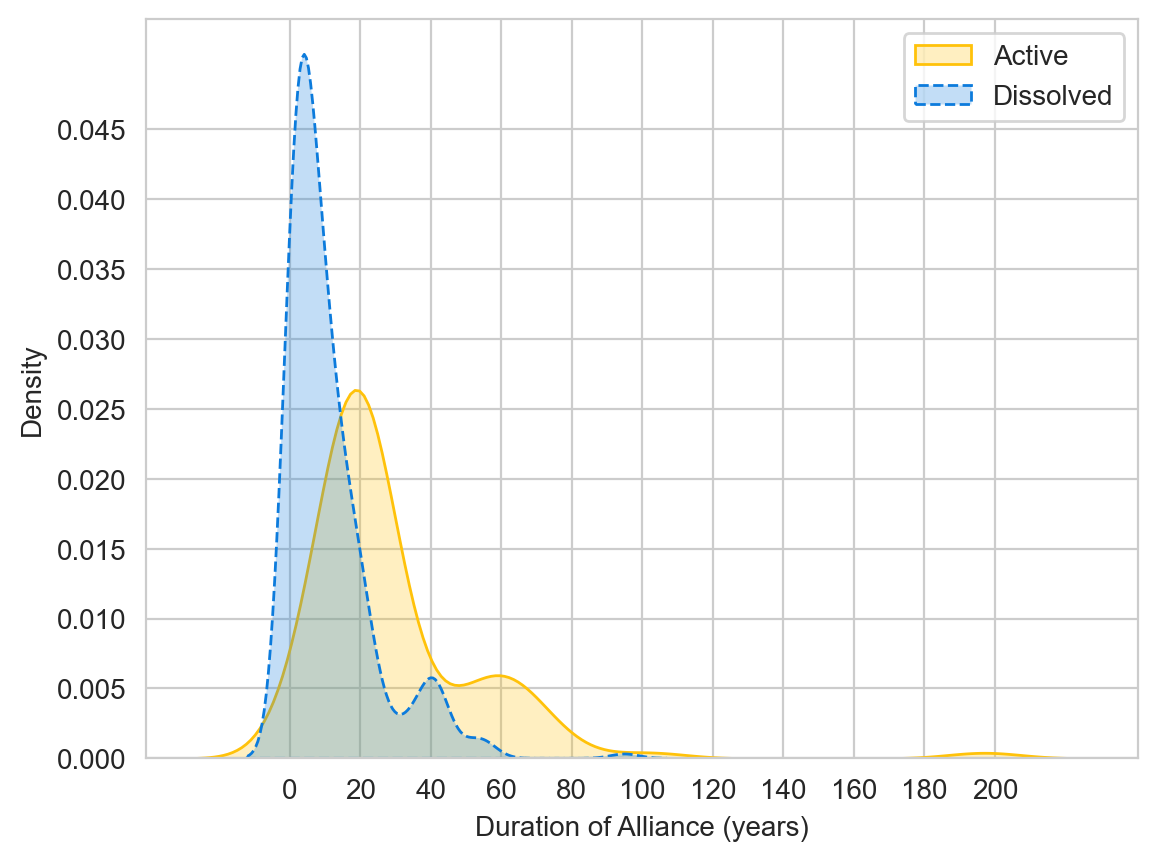

In [23]:
""" Combined Ongoing and Ended Alliance Durations """
# Plot the kernel density estimation (KDE) plot
sns.kdeplot(ongoing_durations['duration'], fill=True,color=cb.quantitative['yelblu'][0])
sns.kdeplot(durations['duration'], fill=True, color=cb.quantitative['yelblu'][1], linestyle='--')
plt.xlabel('Duration of Alliance (years)')
plt.ylabel('Density')
plt.xticks(range(0,205,20))
plt.yticks(np.arange(0,0.05,0.005))
#plt.title('Density Plot of On-Going and Ended Alliance Durations')
plt.legend(['Active','Dissolved'])

In [24]:
""" Two sample T test to compare the two duration samples and see if there are any significant
    differences. """

# Two sample T test
t_statistic, p_value = stats.ttest_ind(durations["duration"], ongoing_durations["duration"], equal_var=False)

# 1% significance level
alpha = 0.01
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in alliance duration.")
else:
    print("Fail to reject the null hypothesis: No significant difference in alliance duration.")

Reject the null hypothesis: There is a significant difference in alliance duration.


In [25]:
""" Filtering data for temporal analysis """

# Filter dataframes for each alliance type superseding the previous tier of obligations
defense_only = ally_dyad[ally_dyad['defense'] == 1]
neutrality_only = ally_dyad.loc[(ally_dyad['neutrality'] == 1) & (ally_dyad['defense'] == 0)]
non_aggression_only = ally_dyad.loc[(ally_dyad['nonaggression'] == 1) & (ally_dyad['neutrality'] == 0) & (ally_dyad['defense'] == 0)]
entente_only = ally_dyad.loc[(ally_dyad['entente'] == 1) & (ally_dyad['nonaggression'] == 0) & (ally_dyad['neutrality'] == 0) & (ally_dyad['defense'] == 0)]

# Groupby ignores years with 0 values, so we add them back
all_years = pd.DataFrame({'year': range(1816, 2012)})

# Groups by alliance, gets the minimum start year, turns into DF, gets counts for each year
alliances_st = ally_dyad.groupby('version4id')['dyad_st_year'].min().reset_index()['dyad_st_year'].value_counts().sort_index()
alliances_end = ally_dyad.groupby('version4id')['dyad_end_year'].max().dropna().reset_index()['dyad_end_year'].value_counts().sort_index()

defense_alliances = defense_only.groupby(['version4id'])['dyad_st_year'].min().reset_index()['dyad_st_year'].value_counts().sort_index()
defense_alliances_end = defense_only.groupby(['version4id'])['dyad_end_year'].max().reset_index()['dyad_end_year'].value_counts().sort_index()

# We only want the alliances we have not accounted for yet so we filter out the defense alliances

neutrality_alliances = neutrality_only.groupby(['version4id'])['dyad_st_year'].min().reset_index()['dyad_st_year'].value_counts().sort_index()
neutrality_alliances_end = neutrality_only.groupby(['version4id'])['dyad_end_year'].max().reset_index()['dyad_end_year'].value_counts().sort_index()

non_aggression_alliances = non_aggression_only.groupby(['version4id'])['dyad_st_year'].min().reset_index()['dyad_st_year'].value_counts().sort_index()
non_aggression_alliances_end = non_aggression_only.groupby(['version4id'])['dyad_end_year'].max().reset_index()['dyad_end_year'].value_counts().sort_index()

entente_alliances = entente_only.groupby(['version4id'])['dyad_st_year'].min().reset_index()['dyad_st_year'].value_counts().sort_index()
entente_alliances_end = entente_only.groupby(['version4id'])['dyad_end_year'].max().reset_index()['dyad_end_year'].value_counts().sort_index()

# Reindex to add years with 0 values
alliances_st_all = alliances_st.reindex(all_years['year']).fillna(0)
alliances_end_all = alliances_end.reindex(all_years['year']).fillna(0)

defense_alliances = defense_alliances.reindex(all_years['year']).fillna(0)
defense_alliances_end = defense_alliances_end.reindex(all_years['year']).fillna(0)

neutrality_alliances = neutrality_alliances.reindex(all_years['year']).fillna(0)
neutrality_alliances_end = neutrality_alliances_end.reindex(all_years['year']).fillna(0)

non_aggression_alliances = non_aggression_alliances.reindex(all_years['year']).fillna(0)
non_aggression_alliances_end = non_aggression_alliances_end.reindex(all_years['year']).fillna(0)

entente_alliances = entente_alliances.reindex(all_years['year']).fillna(0)
entente_alliances_end = entente_alliances_end.reindex(all_years['year']).fillna(0)

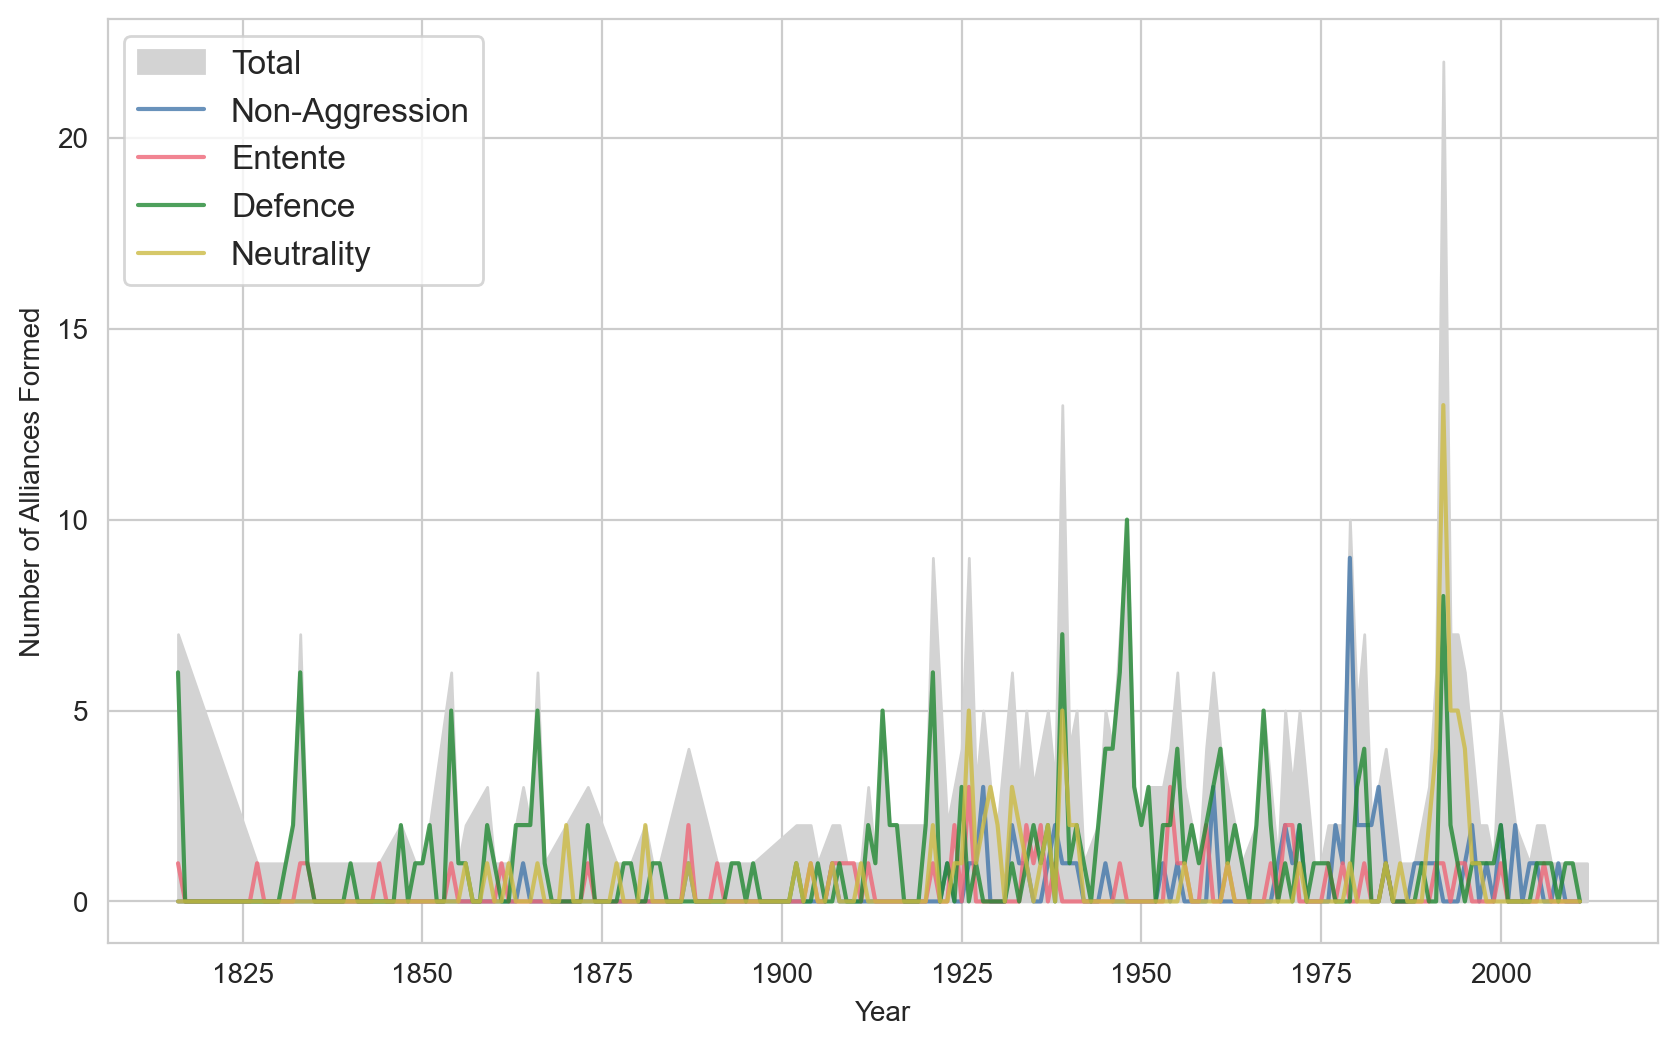

Mean 1956
Median 1962
Mode 1947


In [26]:
""" Time Series graph of alliance formation """

# Plot the temporal analysis graph
form_fig = plt.figure(figsize=(10, 6))
plt.fill_between(alliances_st.index, alliances_st, color='lightgrey', label='Total')
plt.plot(non_aggression_alliances.index, non_aggression_alliances,
         color=cb.quantitative['bright7'][0],label='Non-Aggression', alpha=0.8)
plt.plot(entente_alliances.index, entente_alliances,
         color=cb.quantitative['bright7'][1], label='Entente',alpha=0.8)
plt.plot(defense_alliances.index, defense_alliances,
         color=cb.quantitative['bright7'][2], label='Defence', alpha=0.8)
plt.plot(neutrality_alliances.index, neutrality_alliances,
         color=cb.quantitative['bright7'][3], label='Neutrality', alpha=0.8)

plt.xlabel('Year')
plt.ylabel('Number of Alliances Formed')
#plt.title('Time Series Graph of Alliance Formation')
plt.legend(loc='upper left', fontsize='large')
plt.grid(True)
plt.show()

print("Mean {}\nMedian {}\nMode {}".format(int(ally_dyad['dyad_st_year'].mean().round()),int(ally_dyad['dyad_st_year'].median()),ally_dyad['dyad_st_year'].mode().values[0]))

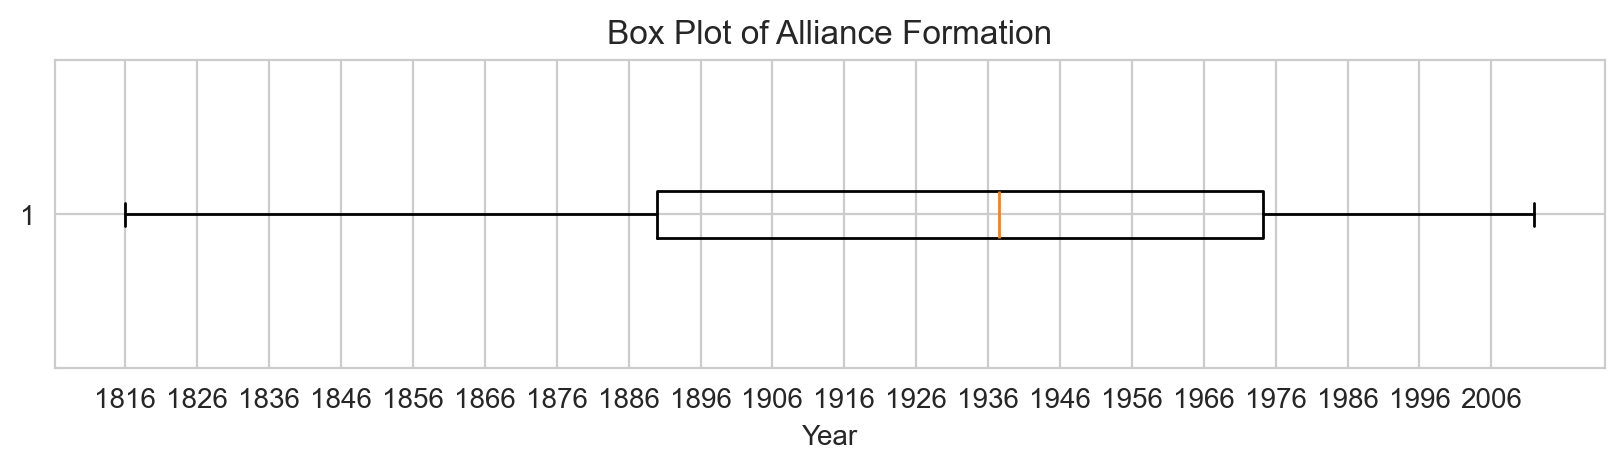

In [27]:
# Box Plot of alliance formation

# Plotting
plt.figure(figsize=(10, 2))
plt.boxplot(alliances_st.index,vert=0)
plt.xlabel('Year')
plt.xticks(range(1816,2012,10))
plt.title('Box Plot of Alliance Formation')
plt.show()

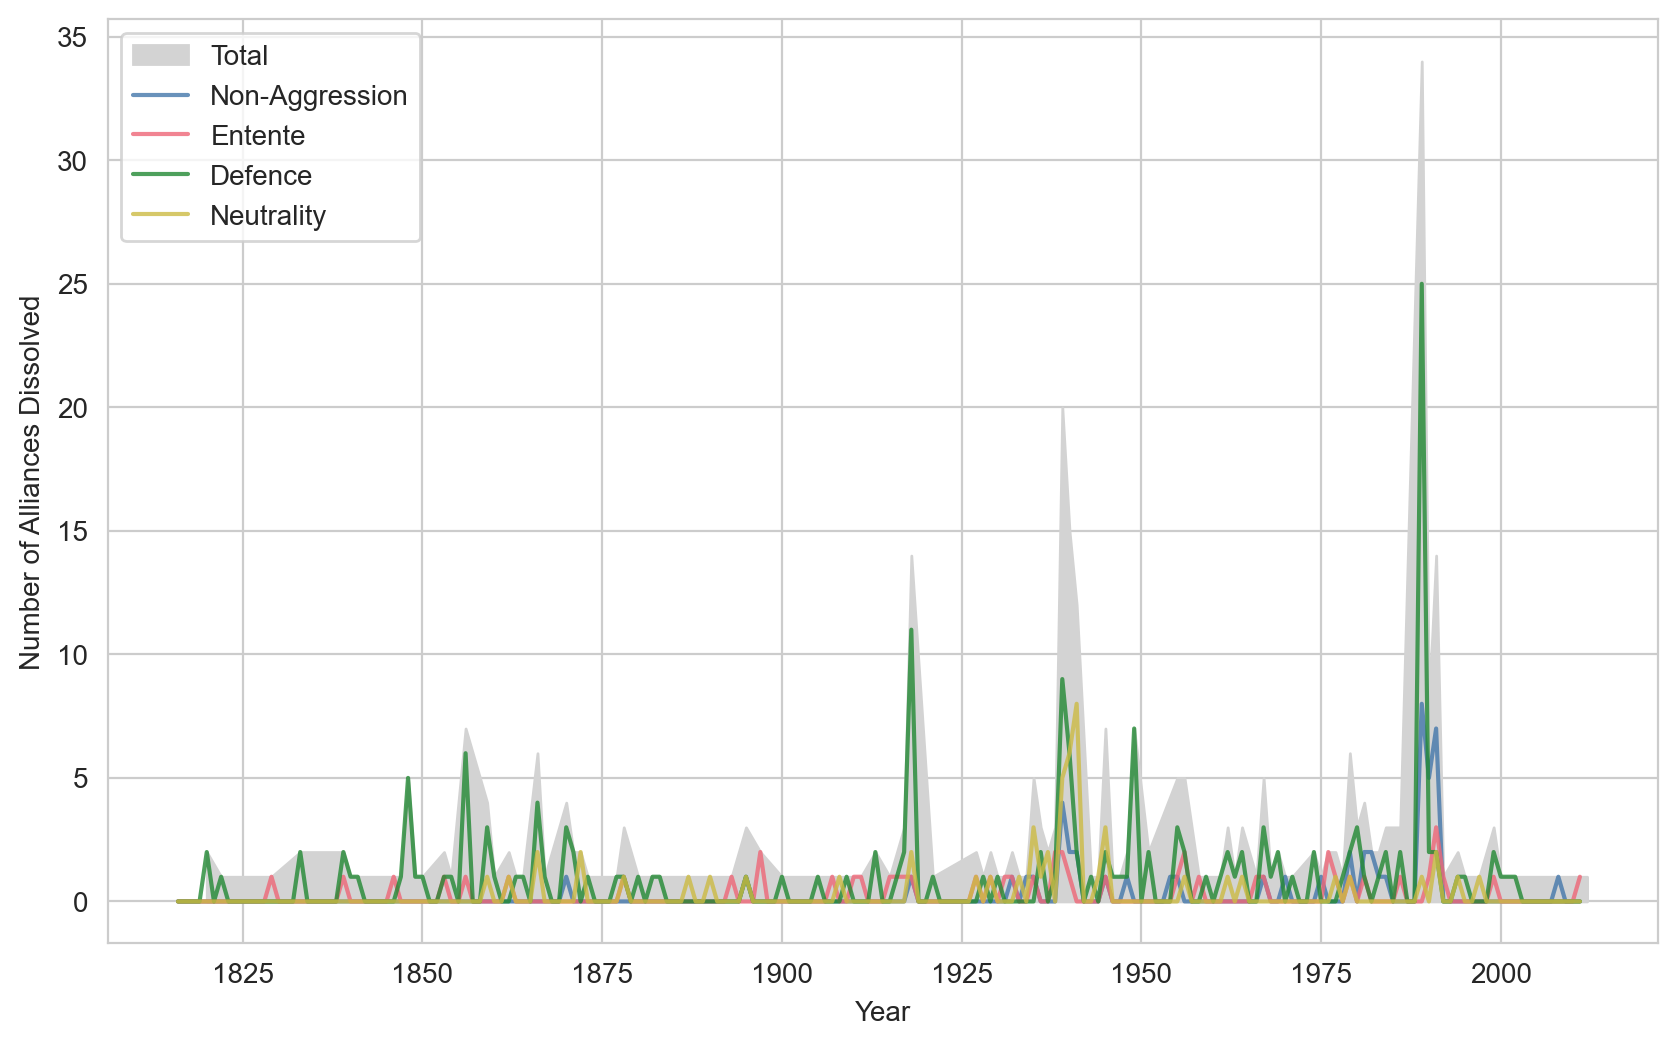

Mean 1944
Median 1947
Mode 1945.0


In [45]:
""" Time Series graph of alliance dissolution"""

# Plot the temporal analysis graph
diss_fig = plt.figure(figsize=(10, 6))
plt.fill_between(alliances_end.index, alliances_end, color='lightgrey', label='Total')
plt.plot(non_aggression_alliances_end.index, non_aggression_alliances_end,
         color=cb.quantitative['bright7'][0], label='Non-Aggression', alpha=0.8)
plt.plot(entente_alliances_end.index, entente_alliances_end,
         color=cb.quantitative['bright7'][1], label='Entente', alpha=0.8)
plt.plot(defense_alliances_end.index, defense_alliances_end,
         color=cb.quantitative['bright7'][2], label='Defence', alpha=0.8)
plt.plot(neutrality_alliances_end.index, neutrality_alliances_end,
         color=cb.quantitative['bright7'][3], label='Neutrality', alpha=0.8)

plt.xlabel('Year')
plt.ylabel('Number of Alliances Dissolved')
#plt.title('Time Series Graph of Alliance Dissolution')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

print("Mean {}\nMedian {}\nMode {}".format(int(ally_dyad['dyad_end_year'].mean().round()),int(ally_dyad['dyad_end_year'].median()),ally_dyad['dyad_end_year'].mode().values[0]))

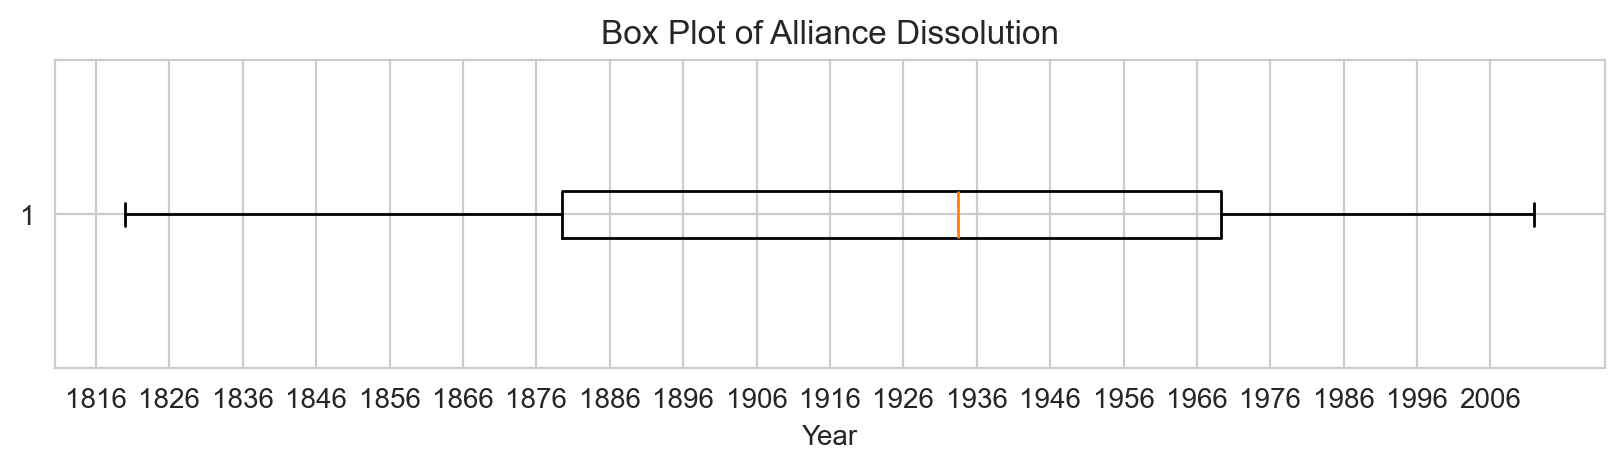

In [29]:
# Box Plot of alliance secession

# Plotting
plt.figure(figsize=(10, 2))
plt.boxplot(alliances_end.index,vert=0)
plt.xlabel('Year')
plt.xticks(range(1816,2012,10))
plt.title('Box Plot of Alliance Dissolution')
plt.show()

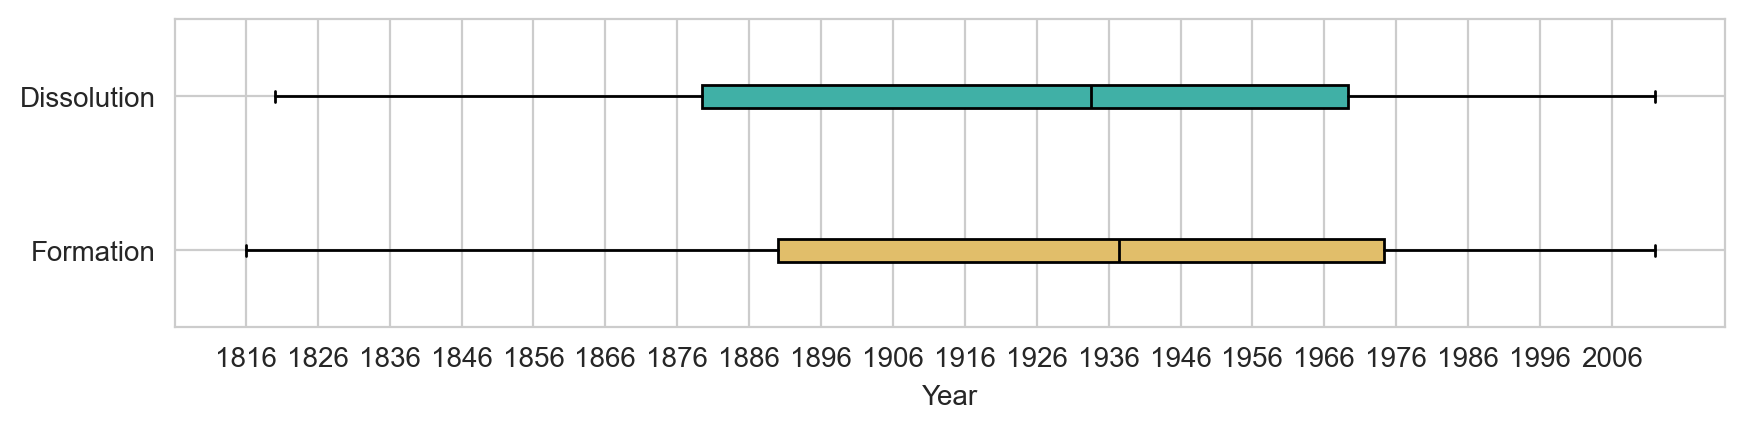

In [30]:
""" Combined Box plots of alliance formation and secession """

plt.figure(figsize=(10, 2))
bp = plt.boxplot([alliances_st.index,alliances_end.index], labels=['Formation', 'Dissolution'], vert=0, patch_artist=True)
bp['boxes'][0].set(facecolor=cb.quantitative['tantuq'][0], edgecolor='black')
bp['boxes'][1].set(facecolor=cb.quantitative['tantuq'][1], edgecolor='black')
bp['medians'][0].set(color='black')
bp['medians'][1].set(color='black')
plt.xlabel('Year')
plt.xticks(range(1816,2012,10))
plt.show()

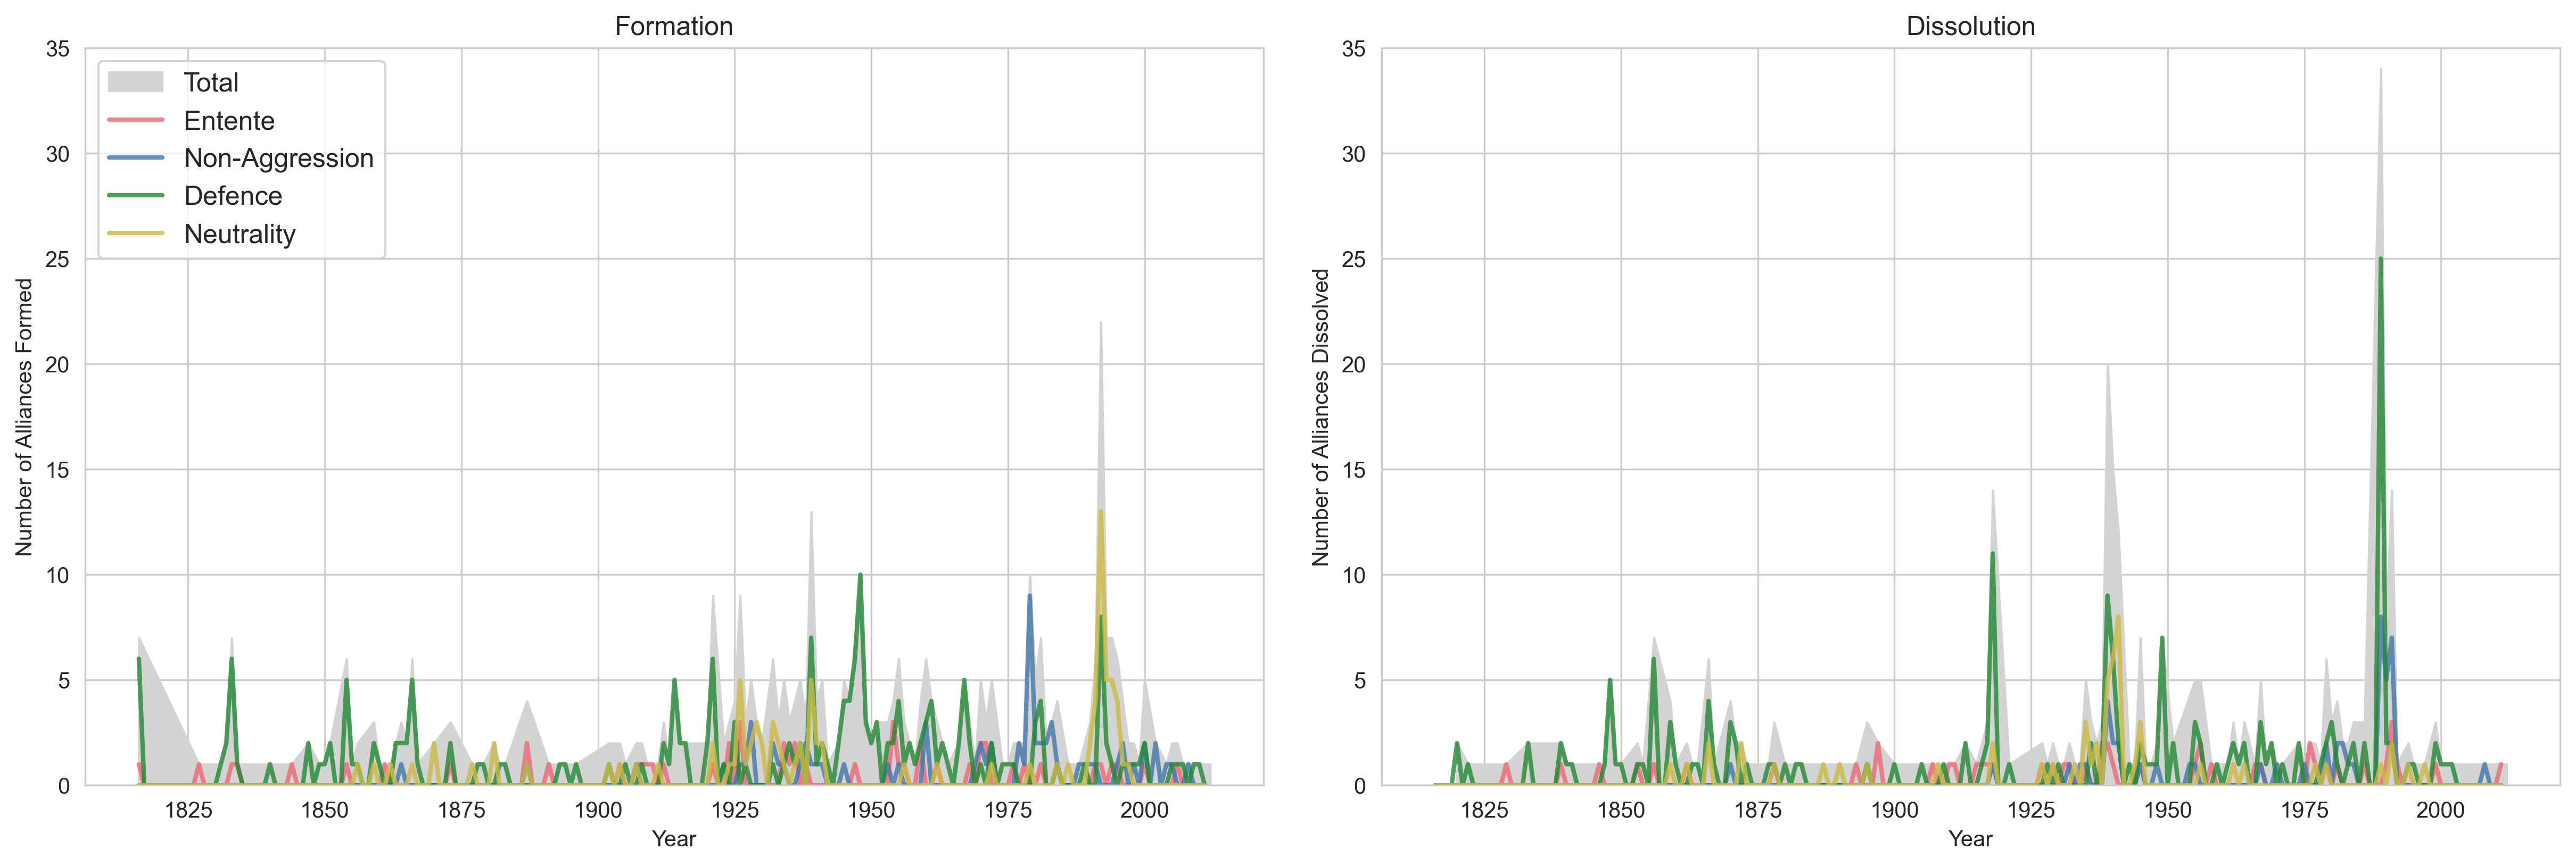

In [75]:
""" Combing the two time series graphs into a single figure."""
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 6))

# Formation
ax1.fill_between(alliances_st.index, alliances_st, color='lightgrey', label='Total')
ax1.plot(entente_alliances.index, entente_alliances,
         color=cb.quantitative['bright7'][1], label='Entente',alpha=0.8, linewidth=2)
ax1.plot(non_aggression_alliances.index, non_aggression_alliances,
         color=cb.quantitative['bright7'][0],label='Non-Aggression', alpha=0.8, linewidth=2)
ax1.plot(defense_alliances.index, defense_alliances,
         color=cb.quantitative['bright7'][2], label='Defence', alpha=0.8, linewidth=2)
ax1.plot(neutrality_alliances.index, neutrality_alliances,
         color=cb.quantitative['bright7'][3], label='Neutrality', alpha=0.8, linewidth=2)

ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Alliances Formed')
ax1.set_title('Formation')
ax1.legend(loc='upper left', fontsize='large')
ax1.grid(True)
ax1.set_ylim(0,35)

#Dissolution
ax2.fill_between(alliances_end.index, alliances_end, color='lightgrey', label='Total')
ax2.plot(entente_alliances_end.index, entente_alliances_end,
         color=cb.quantitative['bright7'][1], label='Entente', alpha=0.8, linewidth=2)
ax2.plot(non_aggression_alliances_end.index, non_aggression_alliances_end,
         color=cb.quantitative['bright7'][0], label='Non-Aggression', alpha=0.8, linewidth=2)
ax2.plot(defense_alliances_end.index, defense_alliances_end,
         color=cb.quantitative['bright7'][2], label='Defence', alpha=0.8, linewidth=2)
ax2.plot(neutrality_alliances_end.index, neutrality_alliances_end,
         color=cb.quantitative['bright7'][3], label='Neutrality', alpha=0.8, linewidth=2)

ax2.set_xlabel('Year')
ax2.set_ylabel('Number of Alliances Dissolved')
ax2.set_title('Dissolution')
ax2.grid(True)
ax2.set_ylim(0,35)

plt.subplots_adjust(wspace=0.1)
plt.savefig('./COW_data/alliance_formation_dissolution.png', bbox_inches='tight')

In [32]:
""" Looking into the formation / secession spikes """
alliances_st[alliances_st > 5]
#defense_alliances[defense_alliances > 5]
ally_dyad[ally_dyad['dyad_st_year'] == 1854]

,version4id,ccode1,state_name1,ccode2,state_name2,dyad_st_day,dyad_st_month,dyad_st_year,dyad_end_day,dyad_end_month,dyad_end_year,left_censor,right_censor,defense,neutrality,nonaggression,entente,asymmetric,version
152,28,200,United Kingdom,220,France,12,3,1854,30.0,3.0,1856.0,0,0,1,0,0,1.0,0,4.1
154,28,200,United Kingdom,640,Turkey,12,3,1854,30.0,3.0,1856.0,0,0,1,0,0,1.0,1,4.1
156,28,220,France,640,Turkey,12,3,1854,30.0,3.0,1856.0,0,0,1,0,0,1.0,1,4.1
158,29,200,United Kingdom,220,France,10,4,1854,30.0,3.0,1856.0,0,0,1,0,0,0.0,0,4.1
161,30,255,Germany,300,Austria-Hungary,20,4,1854,30.0,3.0,1856.0,0,0,1,0,0,0.0,0,4.1
162,31,300,Austria-Hungary,640,Turkey,14,6,1854,30.0,3.0,1856.0,0,0,1,0,0,0.0,1,4.1
163,32,200,United Kingdom,220,France,2,12,1854,30.0,3.0,1856.0,0,0,1,0,0,0.0,0,4.1
164,32,200,United Kingdom,300,Austria-Hungary,2,12,1854,30.0,3.0,1856.0,0,0,1,0,0,0.0,0,4.1
165,32,220,France,300,Austria-Hungary,2,12,1854,30.0,3.0,1856.0,0,0,1,0,0,0.0,0,4.1
166,33,220,France,300,Austria-Hungary,22,12,1854,30.0,3.0,1856.0,0,0,0,0,0,1.0,0,4.1


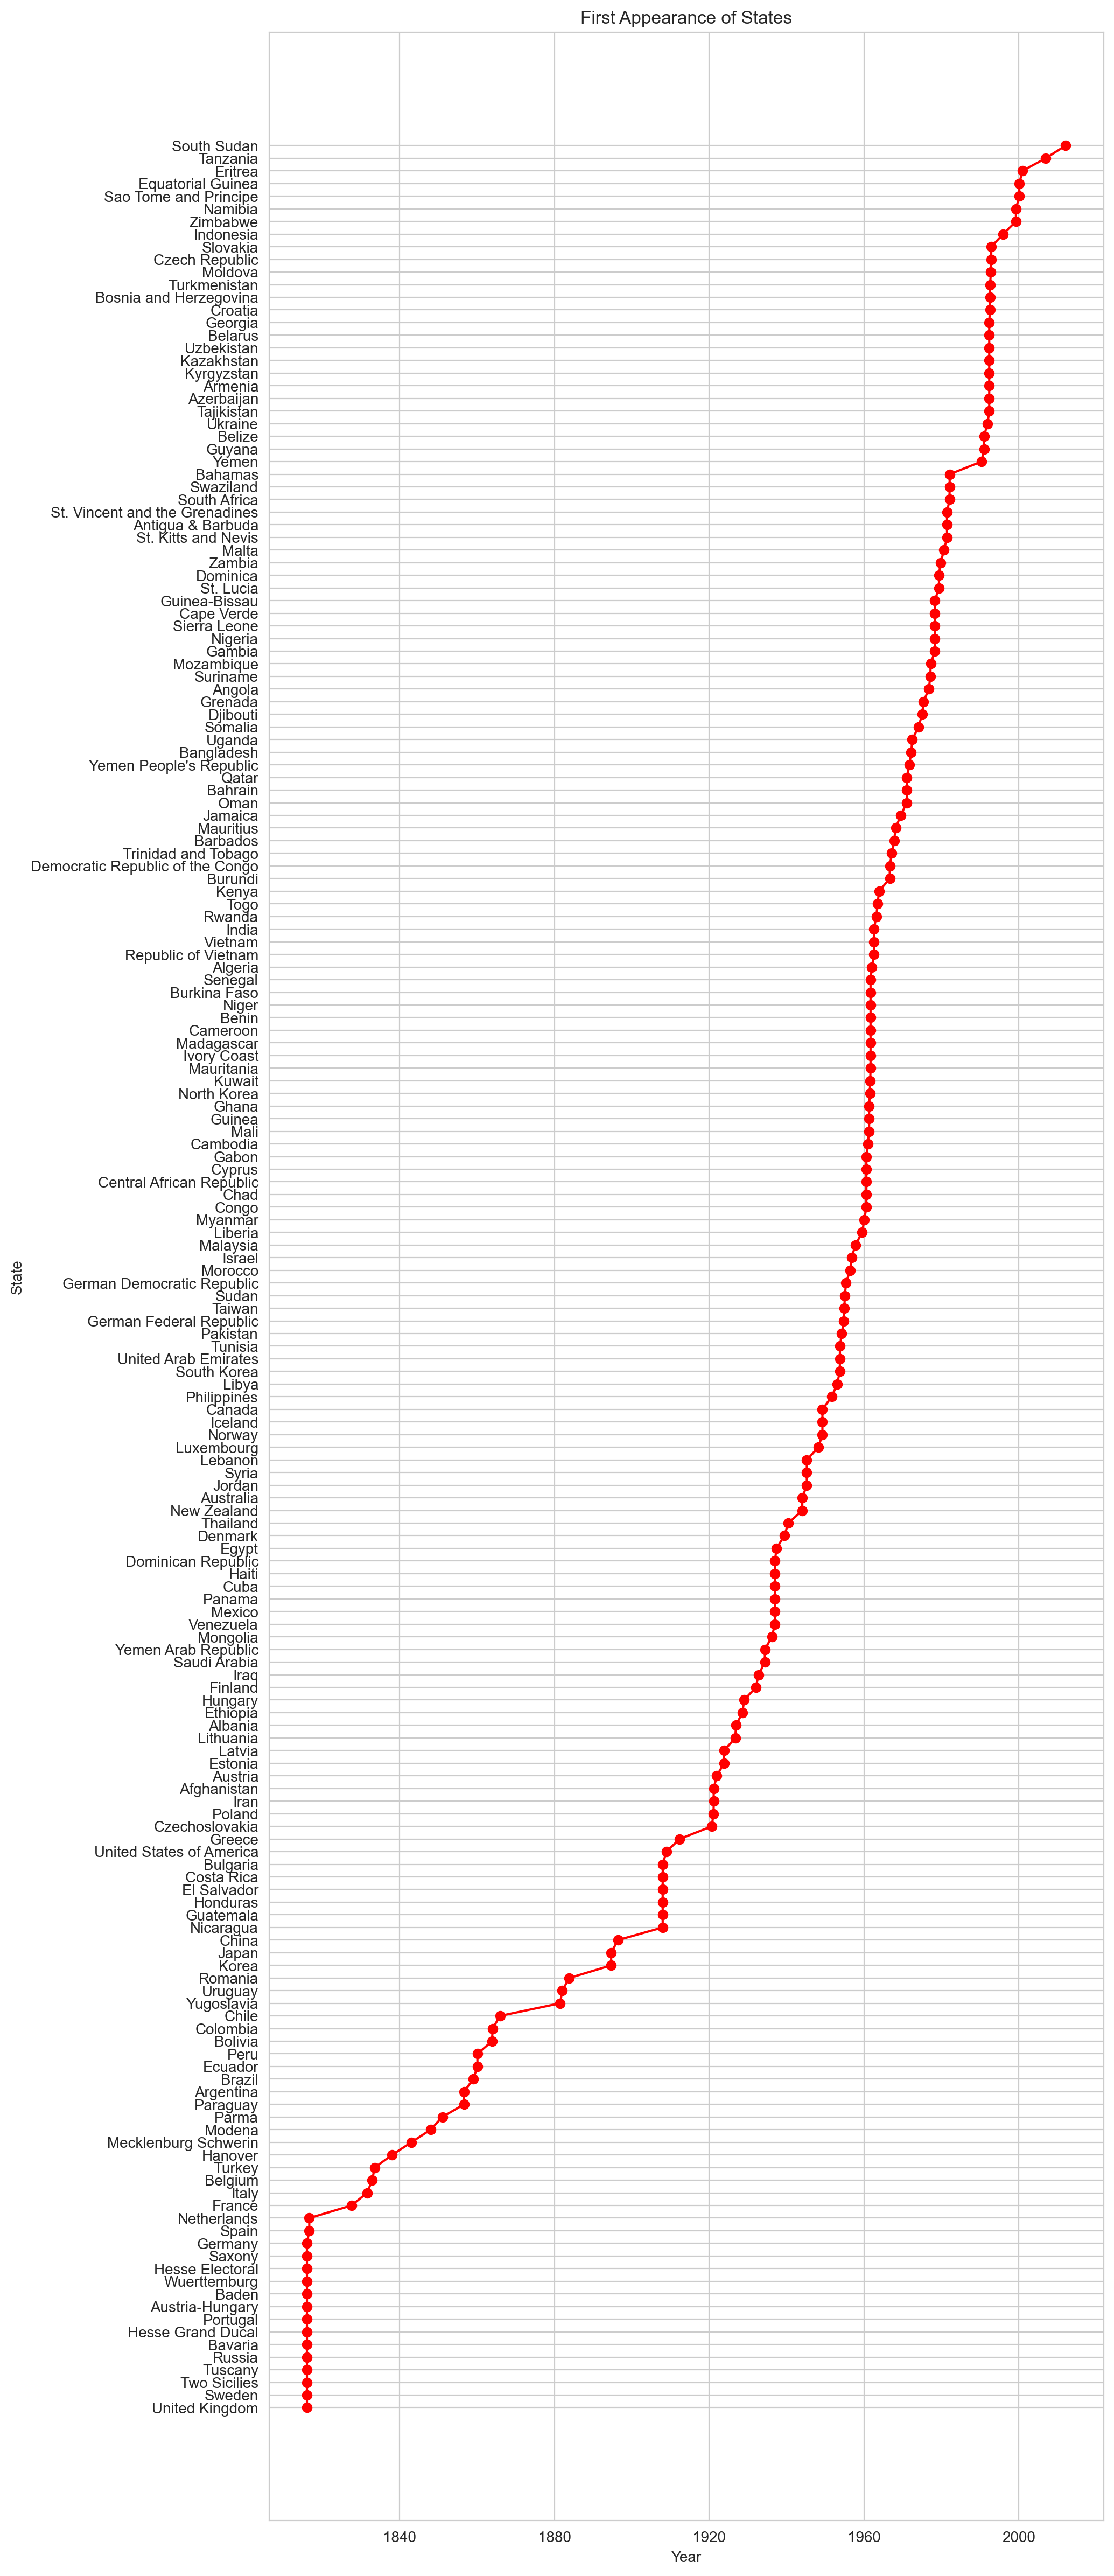

Stats for states entering the dataset:
Mean: 1935-10-27 12:40:00
Median: 1955-11-20 00:00:00
Mode: 1816-01-01T00:00:00.000000000


In [33]:
# Creating a dataframe with a combined start date that is sorted by it
combined_date_df = ally_dyad.drop(['dyad_st_year','dyad_st_day','dyad_st_month'],axis='columns').join(pd.to_datetime(ally_dyad['dyad_st_month'].astype(str)+'/'+ally_dyad['dyad_st_day'].astype(str)+'/'+ally_dyad['dyad_st_year'].astype(str)).rename('date')).sort_values(by='date')

# Getting the first occurance of every state in the dataset
first_occurrence = {}
for state in pd.concat((combined_date_df['state_name1'],combined_date_df['state_name2'])).unique():
    first_occurrence[state] = combined_date_df.loc[(combined_date_df['state_name1'] == state) | (combined_date_df['state_name2'] == state),'date'].min()

first_occurrence_df = pd.DataFrame.from_dict(first_occurrence,orient='index',columns=['date']).sort_values(by='date')

# Plotting the states by their first occurance date
plt.figure(figsize=(10, 30))
plt.plot(first_occurrence_df['date'], first_occurrence_df.index, marker='o', linestyle='-', color='red')
plt.xlabel('Year')
plt.ylabel('State')
plt.title('First Appearance of States')
#plt.xticks(pd.date_range(dt.datetime(1816,1,1),dt.datetime(2012,1,1),10))
plt.show()

# Stats
print("Stats for states entering the dataset:\nMean: {}\nMedian: {}\nMode: {}".format(first_occurrence_df['date'].mean(),first_occurrence_df['date'].median(),first_occurrence_df['date'].mode().values[0]))

In [34]:
ally_dyad[ally_dyad['state_name1']=='Brazil']

,version4id,ccode1,state_name1,ccode2,state_name2,dyad_st_day,dyad_st_month,dyad_st_year,dyad_end_day,dyad_end_month,dyad_end_year,left_censor,right_censor,defense,neutrality,nonaggression,entente,asymmetric,version
174,37,140,Brazil,160,Argentina,2,1,1859,14.0,9.0,1864.0,0,0,1,1,0,0.0,0,4.1
201,48,140,Brazil,160,Argentina,1,5,1865,30.0,7.0,1882.0,0,0,1,0,0,0.0,0,4.1
202,48,140,Brazil,165,Uruguay,1,1,1882,30.0,7.0,1882.0,0,0,1,0,0,0.0,0,4.1
611,165,140,Brazil,145,Bolivia,23,12,1936,23.0,3.0,1945.0,0,0,0,0,0,1.0,0,4.1
612,165,140,Brazil,150,Paraguay,23,12,1936,23.0,3.0,1945.0,0,0,0,0,0,1.0,0,4.1
613,165,140,Brazil,155,Chile,23,12,1936,23.0,3.0,1945.0,0,0,0,0,0,1.0,0,4.1
614,165,140,Brazil,160,Argentina,23,12,1936,23.0,3.0,1945.0,0,0,0,0,0,1.0,0,4.1
615,165,140,Brazil,165,Uruguay,23,12,1936,23.0,3.0,1945.0,0,0,0,0,0,1.0,0,4.1
900,198,140,Brazil,145,Bolivia,6,3,1945,2.0,9.0,1947.0,0,0,1,0,0,1.0,0,4.1
901,198,140,Brazil,150,Paraguay,6,3,1945,2.0,9.0,1947.0,0,0,1,0,0,1.0,0,4.1


In [35]:
# Nato alliance hasn't been updated since 1999
nato_df = ally_dyad[ally_dyad['version4id'] == 227]
print("There are {} countries in Nato".format(pd.concat((nato_df['state_name1'],nato_df['state_name2'])).nunique()))

nato_df
ally_dyad[ally_dyad['dyad_st_year'] == 1949]
#ally_dyad[ally_dyad['version4id'] == ]
#pd.concat([nato_df[nato_df['state_name1'] == 'Yugoslavia'],nato_df[nato_df['state_name1'] == 'Yugoslavia']])
#pd.concat((nato_df['state_name1'],nato_df['state_name2'])).unique()

# 8 members are missing including slovenia and slovakia. the former of which has no alliances in the dataset

#ally_dyad[ally_dyad['ccode2'] == 317]
#ally_dyad[ally_dyad['ccode1'] == 317]
#ally_dyad[ally_dyad['state_name1'] == 'Albania']
#ally_dyad[ally_dyad['state_name2'] == 'Albania']

There are 20 countries in Nato


,version4id,ccode1,state_name1,ccode2,state_name2,dyad_st_day,dyad_st_month,dyad_st_year,dyad_end_day,dyad_end_month,dyad_end_year,left_censor,right_censor,defense,neutrality,nonaggression,entente,asymmetric,version
1816,226,290,Poland,360,Romania,26,1,1949,7.0,8.0,1989.0,0,0,1,0,1,0.0,0,4.1
1817,227,2,United States of America,20,Canada,4,4,1949,NaN,NaN,NaN,0,1,1,0,1,1.0,0,4.1
1818,227,2,United States of America,200,United Kingdom,4,4,1949,NaN,NaN,NaN,0,1,1,0,1,1.0,0,4.1
1819,227,2,United States of America,210,Netherlands,4,4,1949,NaN,NaN,NaN,0,1,1,0,1,1.0,0,4.1
1820,227,2,United States of America,211,Belgium,4,4,1949,NaN,NaN,NaN,0,1,1,0,1,1.0,0,4.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1992,227,325,Italy,395,Iceland,4,4,1949,NaN,NaN,NaN,0,1,1,0,1,1.0,0,4.1
1998,227,385,Norway,390,Denmark,4,4,1949,NaN,NaN,NaN,0,1,1,0,1,1.0,0,4.1
1999,227,385,Norway,395,Iceland,4,4,1949,NaN,NaN,NaN,0,1,1,0,1,1.0,0,4.1
2001,227,390,Denmark,395,Iceland,4,4,1949,NaN,NaN,NaN,0,1,1,0,1,1.0,0,4.1


In [36]:
# Number of states per alliance, version4id starts at 1 not 0 so -1 for searching IDs
no_states_alliance = pd.DataFrame(columns=['version4id','no_states'])
for uid in ally_dyad['version4id'].unique():
    no_states_alliance.loc[len(no_states_alliance)] = {'version4id':uid,'no_states':pd.concat([(ally_dyad[ally_dyad['version4id'] == uid])['state_name1'],(ally_dyad[ally_dyad['version4id'] == uid])['state_name2']]).nunique()}

max_states = max(no_states_alliance['no_states'])
print("{} has the max number of states in an alliance with {}\nMean {}\nMedian {}\nMode {}".format((no_states_alliance[no_states_alliance['no_states'] == max_states])['version4id'].values[0],  max_states,no_states_alliance['no_states'].mean(),no_states_alliance['no_states'].median(),no_states_alliance['no_states'].mode().values[0]))

# State Names of the Rio Pact
#pd.concat([(ally_dyad[ally_dyad['version4id'] == 210])['state_name1'],(ally_dyad[ally_dyad['version4id'] == 210])['state_name2']]).unique()

print("There are {} alliances with more than 2 states".format(len(no_states_alliance[no_states_alliance['no_states'] > 2])))
#no_states_alliance

210 has the max number of states in an alliance with 35
Mean 2.9009661835748792
Median 2.0
Mode 2
There are 88 alliances with more than 2 states


In [37]:
# Rio Pact
rio_pact_df = ally_dyad[ally_dyad['version4id'] == 210]

# States in the Rio Pact
#pd.concat([rio_pact_df['state_name1'],rio_pact_df['state_name2']]).unique()

# Specific countries involvement in the treaty
#pd.concat([rio_pact_df[rio_pact_df['state_name1'] == 'Jamaica'],rio_pact_df[rio_pact_df['state_name2'] == 'Jamaica']])
pd.concat((rio_pact_df['state_name1'], rio_pact_df['state_name2'])).unique()

array(['United States of America', 'Canada', 'Bahamas', 'Cuba', 'Haiti',
       'Dominican Republic', 'Jamaica', 'Trinidad and Tobago', 'Barbados',
       'Dominica', 'Grenada', 'St. Lucia',
       'St. Vincent and the Grenadines', 'Antigua & Barbuda',
       'St. Kitts and Nevis', 'Mexico', 'Belize', 'Guatemala', 'Honduras',
       'El Salvador', 'Nicaragua', 'Costa Rica', 'Panama', 'Colombia',
       'Venezuela', 'Guyana', 'Suriname', 'Ecuador', 'Peru', 'Brazil',
       'Bolivia', 'Paraguay', 'Chile', 'Argentina', 'Uruguay'],
      dtype=object)

In [38]:
seato_df = ally_dyad[ally_dyad['version4id'] == 238]
pd.concat((seato_df['state_name1'], seato_df['state_name2'])).unique()

array(['United States of America', 'United Kingdom', 'France', 'Pakistan',
       'Thailand', 'Philippines', 'Australia', 'New Zealand'],
      dtype=object)

In [39]:
warsaw_pact_df = ally_dyad[ally_dyad['version4id'] == 243]
pd.concat((warsaw_pact_df['state_name1'], warsaw_pact_df['state_name2'])).unique()

array(['German Democratic Republic', 'Poland', 'Hungary',
       'Czechoslovakia', 'Albania', 'Bulgaria', 'Romania', 'Russia'],
      dtype=object)

In [40]:
csto_df = ally_dyad[ally_dyad['version4id'] == 350]
#pd.Series(pd.concat((csto_df['state_name1'], csto_df['state_name2'])).unique()).rename('state')
csto_df[csto_df['state_name2'] == 'Azerbaijan']

ally_dyad[ally_dyad['dyad_st_year'] == 2002]

,version4id,ccode1,state_name1,ccode2,state_name2,dyad_st_day,dyad_st_month,dyad_st_year,dyad_end_day,dyad_end_month,dyad_end_year,left_censor,right_censor,defense,neutrality,nonaggression,entente,asymmetric,version
3134,401,365,Russia,701,Turkmenistan,23,4,2002,NaN,NaN,NaN,0,1,0,0,1,1.0,0,4.1
3135,402,630,Iran,700,Afghanistan,22,12,2002,NaN,NaN,NaN,0,1,0,0,1,0.0,0,4.1
3136,402,630,Iran,701,Turkmenistan,22,12,2002,NaN,NaN,NaN,0,1,0,0,1,0.0,0,4.1
3137,402,630,Iran,702,Tajikistan,22,12,2002,NaN,NaN,NaN,0,1,0,0,1,0.0,0,4.1
3138,402,630,Iran,704,Uzbekistan,22,12,2002,NaN,NaN,NaN,0,1,0,0,1,0.0,0,4.1
3139,402,630,Iran,710,China,22,12,2002,NaN,NaN,NaN,0,1,0,0,1,0.0,0,4.1
3140,402,630,Iran,770,Pakistan,22,12,2002,NaN,NaN,NaN,0,1,0,0,1,0.0,0,4.1
3141,402,700,Afghanistan,701,Turkmenistan,22,12,2002,NaN,NaN,NaN,0,1,0,0,1,0.0,0,4.1
3142,402,700,Afghanistan,702,Tajikistan,22,12,2002,NaN,NaN,NaN,0,1,0,0,1,0.0,0,4.1
3143,402,700,Afghanistan,704,Uzbekistan,22,12,2002,NaN,NaN,NaN,0,1,0,0,1,0.0,0,4.1


In [41]:
# Soviet Union defence treaties 1948
soviet_df = ally_dyad[ally_dyad['dyad_st_year'] == 1948]
pd.concat([soviet_df[soviet_df['state_name1'] == 'Russia'],
           soviet_df[soviet_df['state_name2'] == 'Russia']])

,version4id,ccode1,state_name1,ccode2,state_name2,dyad_st_day,dyad_st_month,dyad_st_year,dyad_end_day,dyad_end_month,dyad_end_year,left_censor,right_censor,defense,neutrality,nonaggression,entente,asymmetric,version
1810,220,365,Russia,375,Finland,6,4,1948,25.0,12.0,1991.0,0,0,1,0,0,1.0,0,4.1
1762,216,360,Romania,365,Russia,4,2,1948,12.0,12.0,1989.0,0,0,1,0,1,0.0,0,4.1
1763,217,310,Hungary,365,Russia,18,2,1948,7.0,10.0,1989.0,0,0,1,0,1,0.0,0,4.1
1809,219,355,Bulgaria,365,Russia,18,3,1948,10.0,11.0,1989.0,0,0,1,0,1,0.0,0,4.1
